# Endemo 2 - Useful Energy Demand Model Rework

## Create Input Manager

In [1]:
import pandas as pd

import input
import output
import sector
import utility as uty

# create input manager to read all input
input_manager = input.Input()
target_year = input_manager.ctrl.general_settings.target_year

# check if the right things were read


EU27
Abbreviation: EU
EU28
Abbreviation: EU
BE
BE1 
Abbreviation: BE
Add to existing abbreviation.
BE1
Abbreviation: BE
Add to existing abbreviation.
BE2 
Abbreviation: BE
Add to existing abbreviation.
BE21
Abbreviation: BE
Add to existing abbreviation.
BE22
Abbreviation: BE
Add to existing abbreviation.
BE23
Abbreviation: BE
Add to existing abbreviation.
BE24
Abbreviation: BE
Add to existing abbreviation.
BE25
Abbreviation: BE
Add to existing abbreviation.
BE3 
Abbreviation: BE
Add to existing abbreviation.
BE31
Abbreviation: BE
Add to existing abbreviation.
BE32
Abbreviation: BE
Add to existing abbreviation.
BE33
Abbreviation: BE
Add to existing abbreviation.
BE34
Abbreviation: BE
Add to existing abbreviation.
BE35
Abbreviation: BE
Add to existing abbreviation.
BG
BG3 
Abbreviation: BG
Add to existing abbreviation.
BG31
Abbreviation: BG
Add to existing abbreviation.
BG32
Abbreviation: BG
Add to existing abbreviation.
BG33
Abbreviation: BG
Add to existing abbreviation.
BG34
Abbreviati

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\input.py:104: UserWarning: NUTS region EU27 might not be read correctly. No parent region was read, but the region code is longer than 2 letters
  warnings.warn("NUTS region " + region_name + " might not be read correctly. No parent region "
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\input.py:104: UserWarning: NUTS region EU28 might not be read correctly. No parent region was read, but the region code is longer than 2 letters
  warnings.warn("NUTS region " + region_name + " might not be read correctly. No parent region "
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\input.py:104: UserWarning: NUTS region EFTA might not be read correctly. No parent region was read, but the region code is longer than 2 letters
  warnings.warn("NUTS region " + region_name + " might not be read correctly. No parent region "


Input was successfully read.


### Check if settings were read correctly

In [2]:
# active products
print(uty.str_dict(input_manager.general_input.population.nuts2_population))


Dictionary: {}


In [3]:
# general settings
gs = input_manager.ctrl.general_settings
print("Forecast year: " + str(gs.target_year))
print("Active sectors: " + str(gs.get_active_sectors()))
# print("Population Forecast: " + input_manager.ctrl.general_settings.population_forecast)
#print("Timeseries Forecast: " + ...)
# nuts ...
# world
# nuts2 classification
# graphical output
# calculate final energy demand

Forecast year: 2018
Active sectors: ['industry', 'households', 'transport', 'commertial, trade, services']


In [4]:
print("Active Countries: \n" + str(gs.active_countries))

Active Countries: 
0                    Belgium
1                   Bulgaria
2                    Czechia
3                    Denmark
4                    Germany
5                    Ireland
6                     Greece
7                      Spain
8                     France
9                    Croatia
10                     Italy
11                    Latvia
12                Luxembourg
13                   Hungary
14               Netherlands
15                   Austria
16                    Poland
17                  Portugal
18                   Romania
19                  Slovenia
20                  Slovakia
21                   Finland
22                    Sweden
23            United Kingdom
24                    Norway
25               Switzerland
26                Montenegro
27           North Macedonia
28                   Albania
29                    Serbia
30    Bosnia and Herzegovina
31                   Iceland
32                 Lithuania
33                   Est

In [5]:
# industry settings
inds = input_manager.ctrl.industry_settings
print("Forecast method: " + str(inds.forecast_method))
# print("Timetrendmodel for u-shape")
print("Calculated per capita: " + str(inds.production_quantity_calc_per_capita))
print("Calc Specific Energy Requirements: " + str(inds.trend_calc_for_spec))
print("H2 subst of heat: " + str(inds.h2_subst_of_heat))
# print(nuts2...)
print("Skip years: " + str(inds.skip_years))
print("Last available year (excluding): " + str(inds.last_available_year))

Forecast method: ForecastMethod.LINEAR
Calculated per capita: True
Calc Specific Energy Requirements: True
H2 subst of heat: False
Skip years: [2009]
Last available year (excluding): 2019


## Fill countries with information

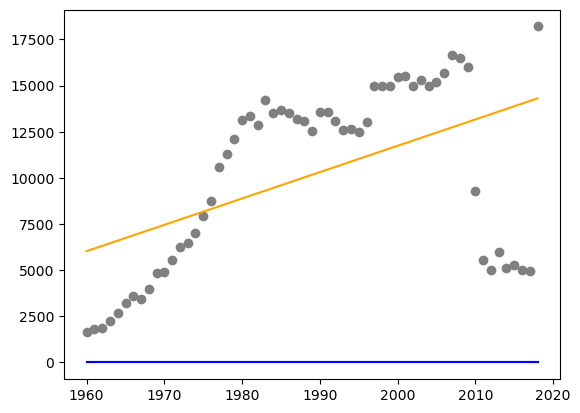

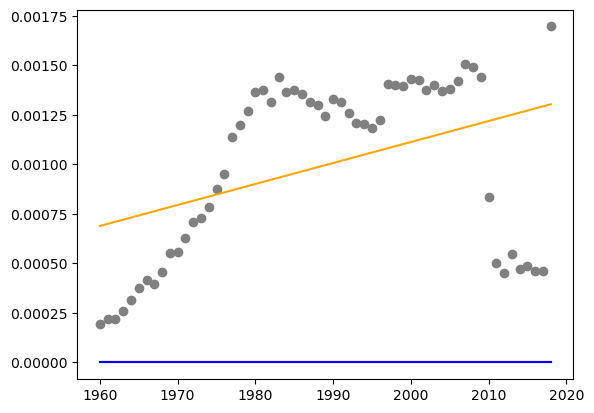

All active countries were successfully filled with data.


In [6]:
import country as cty

countries = []

for country_name in input_manager.ctrl.general_settings.active_countries:
    countries.append(cty.Country(country_name, input_manager))

print("All active countries were successfully filled with data.")

## Generate output

In [7]:
import os
import industry_sector as ind

if not os.path.exists(input_manager.output_path):
    os.makedirs(input_manager.output_path)
    print("Created folder " + str(input_manager.output_path))

### Coefficients Output

In [8]:
coef_out_file_path = input_manager.output_path / "endemo2_coefficients_production.xlsx"

with pd.ExcelWriter(coef_out_file_path) as excel_writer:
    for product_name, product_obj in input_manager.industry_input.active_products.items():
        sheet_name = product_name
        dict_out = {"Country": [], "EXP Start Point": [], "EXP Change Rate": [], "LIN Coef": [], "QUADR Coef": [], "Per Capita": [], "Per GDP": [], "Production is empty": [], "Last Data Entry": []}
        for country in countries:
            dict_out["Country"].append(country.get_name())
            product = country.get_sector(sector.SectorIdentifier.INDUSTRY).get_product(product_name)
            coef = product.get_coef()
            dict_out["EXP Start Point"].append("(" + str(coef.exp.x0) + ", " + str(coef.exp.y0) + ")")
            dict_out["EXP Change Rate"].append(coef.exp.r)
            dict_out["LIN Coef: k0"].append(str(coef.lin.k0))
            dict_out["LIN Coef: k1"].append(str(coef.lin.k1))
            dict_out["QUADR Coef: k0"].append(str(coef.quadr.k0))
            dict_out["QUADR Coef: k1"].append(str(coef.quadr.k1))
            dict_out["QUADR Coef: k2"].append(str(coef.quadr.k2))
            dict_out["Per Capita"].append(str(product._use_per_capita))
            dict_out["Per GDP"].append(str(product._use_gdp_as_x))
            dict_out["Production is empty"].append(str(product._empty_product))
            dict_out["Last Data Entry"].append(str(product.get_active_timeseries().get_last_data_entry()))
        dict_out = pd.DataFrame(dict_out)
        dict_out.to_excel(excel_writer, index=False, sheet_name=sheet_name, float_format="%.5f")

print("Coefficients for Production " + " was successfully written to " + str(coef_out_file_path))

IndexError: At least one sheet must be visible

### Population Prognosis Output

In [ ]:
pop_out_file_path = input_manager.output_path / ("endemo2_population_projections_" + str(target_year) + ".xlsx")

dict_pop_out = {"Country": [], str(target_year): []}

for country in countries:
    dict_pop_out["Country"].append(country.get_name())
    dict_pop_out[str(target_year)].append(country.get_population().get_prog(target_year))

df_pop_out = pd.DataFrame(dict_pop_out)
df_pop_out.to_excel(pop_out_file_path, index=False, sheet_name="Prognosis")

print("Population prognosis for year " + str(target_year) + " was successfully written to " + str(pop_out_file_path))

### Gdp Prognosis Output

In [ ]:
gdp_out_file_path = input_manager.output_path / ("endemo2_gdp_projections_" + str(target_year) + ".xlsx")

dict_gdp_out = {"Country": [], str(target_year): []}

for country in countries:
    dict_gdp_out["Country"].append(country.get_name())
    dict_gdp_out[str(target_year)].append(country.get_gdp().get_prog(target_year))

df_gdp_out = pd.DataFrame(dict_gdp_out)
df_gdp_out.to_excel(gdp_out_file_path, index=False, sheet_name="Prognosis")

print("GDP prognosis for year " + str(target_year) + " was successfully written to " + str(gdp_out_file_path))

### Amount Prognosis Output

In [ ]:
from pandas import ExcelWriter

amount_out_file_path = input_manager.output_path / ("endemo2_amount_projections_" + str(target_year) + ".xlsx")

with pd.ExcelWriter(amount_out_file_path) as excel_writer:
    for product_name, product_obj in input_manager.industry_input.active_products.items():
        sheet_name = product_name
        dict_amount_out = {"Country": [], "Amount [kt]": []}
        for country in countries:
            dict_amount_out["Country"].append(country.get_name())
            if input_manager.ctrl.industry_settings.production_quantity_calc_per_capita:
                dict_amount_out["Amount [kt]"].append(country.get_sector(sector.SectorIdentifier.INDUSTRY).prog_product_amount(product_name, target_year) * country.get_population().get_prog(target_year))
            else:
                dict_amount_out["Amount [kt]"].append(country.get_sector(sector.SectorIdentifier.INDUSTRY).prog_product_amount(product_name, target_year))
        df_amount_out = pd.DataFrame(dict_amount_out)
        df_amount_out.to_excel(excel_writer, index=False, sheet_name=sheet_name, float_format="%.10f")

print("Product prognosis for year " + str(target_year) + " was successfully written to " + str(amount_out_file_path))


### Specific Consumption Prognosis Output

In [ ]:
import products as prod
from pandas import ExcelWriter

sc_out_file_path = input_manager.output_path / ("endemo2_specific_consumption_projections_" + str(target_year) + ".xlsx")

with pd.ExcelWriter(sc_out_file_path) as excel_writer:
    for product_name, product_obj in input_manager.industry_input.active_products.items():
        sheet_name = product_name
        dict_sc_out = {"Country": [], "Electricity [GJ/t]": [], "Heat [GJ/t]": [], "Hydrogen [GJ/t]": [], "max. subst. of heat with H2 [%]": []}
        for country in countries:
            dict_sc_out["Country"].append(country.get_name())
            sc: prod.SC = country.get_sector(sector.SectorIdentifier.INDUSTRY).get_product(product_name).get_specific_consumption().get(target_year)
            dict_sc_out["Electricity [GJ/t]"].append(sc.electricity)
            dict_sc_out["Heat [GJ/t]"].append(sc.heat)
            dict_sc_out["Hydrogen [GJ/t]"].append(sc.hydrogen)
            dict_sc_out["max. subst. of heat with H2 [%]"].append(sc.max_subst_h2)
        df_sc_out = pd.DataFrame(dict_sc_out)
        df_sc_out.to_excel(excel_writer, index=False, sheet_name=sheet_name, float_format="%.5f")

print("Product Specific Consumption prognosis for year " + str(target_year) + " was successfully written to " + str(sc_out_file_path))


### Demand Prognosis Output

In [ ]:
demand_out_file_path = input_manager.output_path / ("endemo2_demand_projections_" + str(target_year) + ".xlsx")

with pd.ExcelWriter(demand_out_file_path) as excel_writer:
    for product_name, product_obj in input_manager.industry_input.active_products.items():
        sheet_name = product_name
        dict_demand_out = {"Country": [], "Electricity [TWh]": [], "Heat [TWh]": [], "Hydrogen [TWh]": [], "Heat Q1 [TWh]": [], "Heat Q2 [TWh]": [], "Heat Q3 [TWh]": [], "Heat Q4 [TWh]": [], "Perc. Used [%]": []}
        for country in countries:
            dict_demand_out["Country"].append(country.get_name())
            product = country.get_sector(sector.SectorIdentifier.INDUSTRY).get_product(product_name)
            demand: output.Demand = product.calculate_demand(target_year)
            dict_demand_out["Electricity [TWh]"].append(demand.electricity)
            dict_demand_out["Heat [TWh]"].append(demand.heat.q1 + demand.heat.q2 + demand.heat.q3 + demand.heat.q4)
            dict_demand_out["Hydrogen [TWh]"].append(demand.hydrogen)
            dict_demand_out["Heat Q1 [TWh]"].append(demand.heat.q1)
            dict_demand_out["Heat Q2 [TWh]"].append(demand.heat.q2)
            dict_demand_out["Heat Q3 [TWh]"].append(demand.heat.q3)
            dict_demand_out["Heat Q4 [TWh]"].append(demand.heat.q4)
            dict_demand_out["Perc. Used [%]"].append(product._perc_used * 100)
        df_demand_out = pd.DataFrame(dict_demand_out)
        df_demand_out.to_excel(excel_writer, index=False, sheet_name=sheet_name, float_format="%.5f")

print("Product Demand prognosis for year " + str(target_year) + " was successfully written to " + str(demand_out_file_path))

## Test Utility functions
### Test Regression

In [ ]:
import utility as uty

# Test Linear Regression

x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
y = [1258.809906,1259.17278,1259.17278,1111.120188,1063.946568,1124.9094,1100.233968,1100.233968,1095.153732]
data = list(zip(x, y))

uty.linear_regression(data, visualize=True)

# Test Quadratic Regression

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.quadratic_regression(data, visualize=True)


### Test filter out NaN and Inf

In [ ]:
import numpy as np
import math
import utility as uty

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, np.NaN, np.inf, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.filter_out_nan_and_inf(data)

### Combining Data on the x axis

Attention! If the x axis is ascending for both data arrays, use ascending_x=True for better performance!

In [ ]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(uty.combine_data_on_x(a, b, ascending_x=True))

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(3, 3000),(2, 2000),  (5, 5000)]

print(uty.combine_data_on_x(a, b))


### Zip on X explained

In [ ]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(list(uty.zip_on_x(a, b)))

In [ ]:
import utility as uty

amount = [(1998, 10), (2001, 12), (2003, 11), (2006, 13)]
population = [(2000, 10000), (2001, 11000), (2002, 12000), (2003, 13000), (2004, 14000), (2005, 14000), (2006, 15000)]
gdp = [(2000, 20), (2001, 30), (2002, 20), (2003, 30), (2004, 40), (2005, 50), (2006, 60)]

zip_amount_pop = list(uty.zip_on_x(amount, population))

print("zipped amount & population: " + str(zip_amount_pop))
print("Transformed amount to per capita: " + str(list(map(lambda arg: (arg[0][0], arg[0][1] / arg[1][1]), zip_amount_pop))))